Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12121216925797327892
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7038498752989574295
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/SKIN_CANCER_DATA/Test/')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

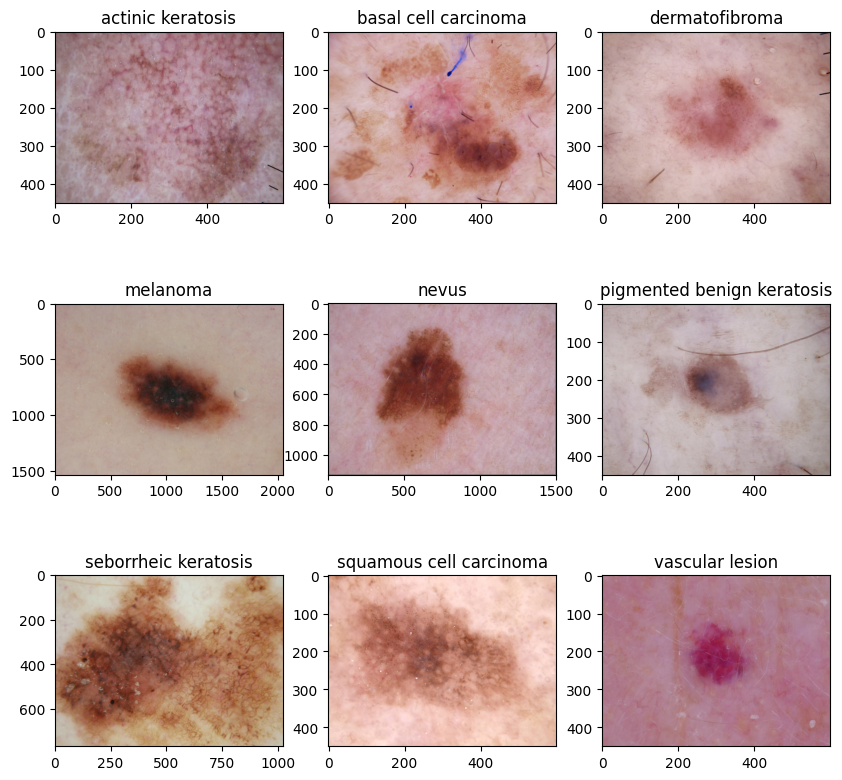

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

num_classes = 9
model=Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 30s 182ms/step - loss: 2.0600 - accuracy: 0.1875 - val_loss: 2.0480 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 6s 101ms/step - loss: 2.0344 - accuracy: 0.1987 - val_loss: 2.0310 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 92ms/step - loss: 2.0244 - accuracy: 0.2104 - val_loss: 2.0365 - val_accuracy: 0.2036
Epoch 4/20
56/56 [==============================] - 5s 91ms/step - loss: 2.0196 - accuracy: 0.1998 - val_loss: 2.0443 - val_accuracy: 0.2327
Epoch 5/20
56/56 [==============================] - 5s 89ms/step - loss: 2.0971 - accuracy: 0.1908 - val_loss: 2.0578 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0059 - accuracy: 0.2081 - val_loss: 2.0705 - val_accuracy: 0.2125
Epoch 7/20
56/56 [==============================] - 5s 87ms/step - loss: 2.0074 - accuracy: 0.2070 - val_loss: 2.0578 - val_accuracy: 0.2058
Epoch 8/20
56/56 [===

### Visualizing training results

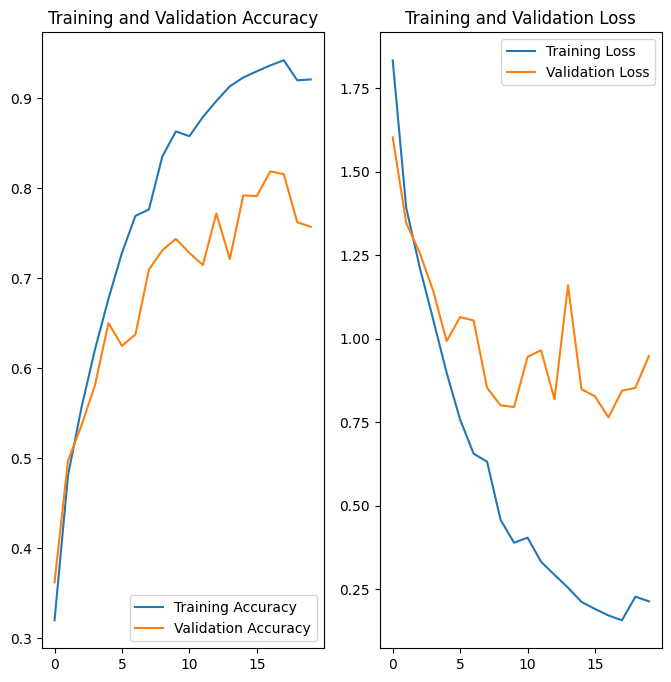

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

# Findings
As we can see the training accuray is around 90% but the validition is low compared to that. So we can conclude that the model is overfitting. As the model is probably memorizeing the images, we can provide more images to solve this issue.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3),seed=123),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

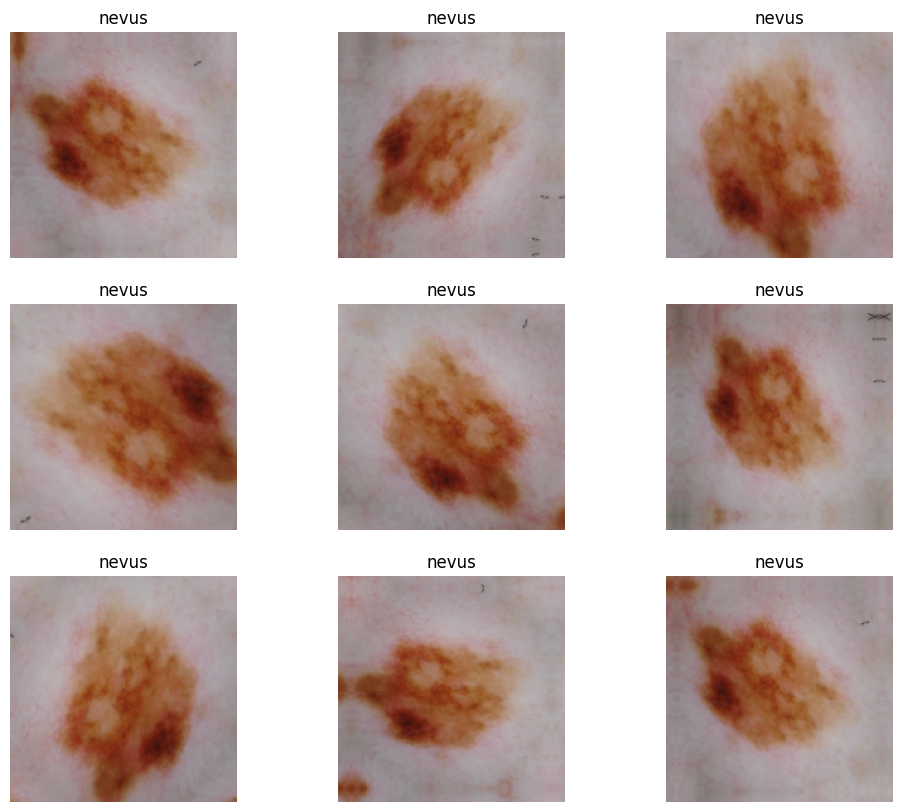

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")
plt.show()

### Todo:
### Create the model, compile and train the model


In [ ]:
model=Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 4s 38ms/step - loss: 2.0460 - accuracy: 0.2433 - val_loss: 1.8732 - val_accuracy: 0.3110
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 1.8593 - accuracy: 0.3119 - val_loss: 1.8232 - val_accuracy: 0.3579
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.6938 - accuracy: 0.3756 - val_loss: 1.6103 - val_accuracy: 0.4765
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.5617 - accuracy: 0.4548 - val_loss: 1.4637 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.4457 - accuracy: 0.4905 - val_loss: 1.5099 - val_accuracy: 0.4586
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4129 - accuracy: 0.5017 - val_loss: 1.6332 - val_accuracy: 0.4564
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3657 - accuracy: 0.5173 - val_loss: 1.3788 - val_accuracy: 0.4989
Epoch 8/20
56/56 [======

### Visualizing the results

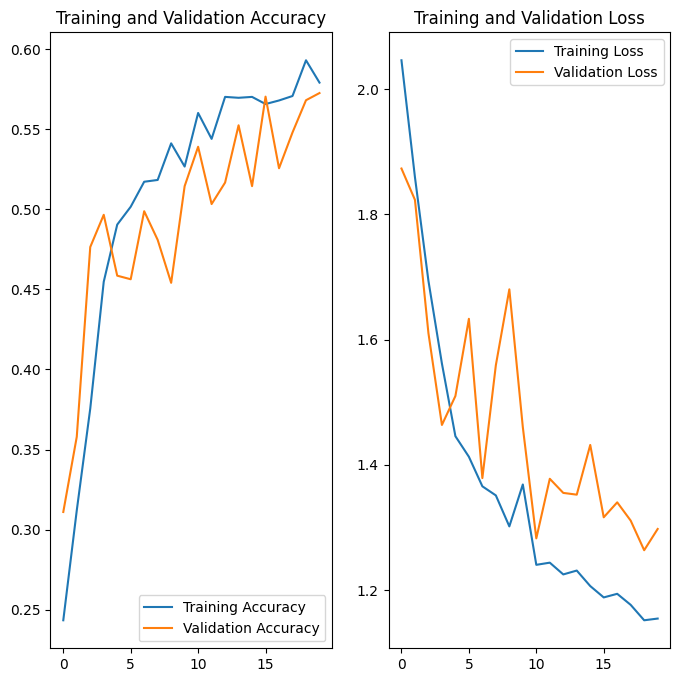

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Findings
We can ovserve the issue of the overfitting is now eliminated using data augmentation. For increasing the accuracy we can run it for more epochs, also we can add more images in the data set.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [6]:
## Your code goes here.
from glob import glob
import os
path_list=[x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
cancer_type_list=[os.path.basename(os.path.dirname(i)) for i in glob(os.path.join(data_dir_train, '*', '*.jpg'))]


In [7]:
original_df=pd.DataFrame(list(dict(zip(path_list,cancer_type_list)).items()),columns=['path','cancer_type'])


In [8]:
original_df['cancer_type'].value_counts()


pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: cancer_type, dtype: int64

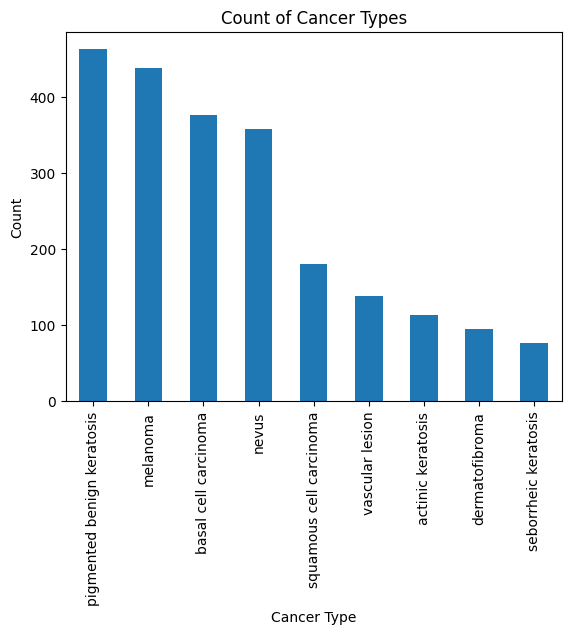

In [9]:
cancer_type_counts = original_df['cancer_type'].value_counts()
cancer_type_counts.plot(kind='bar')
plt.title('Count of Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Count')


plt.show()


#### - Which class has the least number of samples?
As we can see in the above plot, seborrheic keratosis	(77) have least number of samples

#### - Which classes dominate the data in terms proportionate number of samples?

pigmented benign keratosis(462)

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DA6539386A0>: 100%|██████████| 500/500 [00:17<00:00, 29.01 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DA62E6B13C0>: 100%|██████████| 500/500 [00:18<00:00, 27.33 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DA6A006DDE0>: 100%|██████████| 500/500 [00:17<00:00, 29.23 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x7DA62BDFC520>: 100%|██████████| 500/500 [01:28<00:00,  5.65 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7DA62BC58F10>: 100%|██████████| 500/500 [01:15<00:00,  6.59 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DA62DD03A00>: 100%|██████████| 500/500 [00:17<00:00, 29.05 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DA68C2EA3E0>: 100%|██████████| 500/500 [00:38<00:00, 12.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DA6A006DDE0>: 100%|██████████| 500/500 [00:17<00:00, 28.90 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DA6A006CC70>: 100%|██████████| 500/500 [00:17<00:00, 29.41 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [10]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [11]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029713.jpg_05e35ba0-45df-48c3-b543-5ade1c9cdf1f.jpg',
 '/content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030344.jpg_8c6fbd68-2739-4929-84a0-092cae0a4c7f.jpg',
 '/content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029830.jpg_842f864d-89ac-4bdc-bed8-c937f44b3115.jpg',
 '/content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028854.jpg_99f25cb0-27ad-4f1d-a42a-c25412d73e9e.jpg',
 '/content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026212.jpg_6fb7e4e6-2175-4245-9606-c71de312e07f.jpg',
 '/content/gdrive/MyDrive/SKIN_CANCER_DATA/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029210.jpg_0884e741-809a-42c9-b119-9ae0ea0aed5a.jpg',
 '/content/gdrive/MyDrive/SKIN_CAN

In [12]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [13]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [14]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['path','cancer_type'])
new_df = original_df.append(df2)

<ipython-input-14-b06609776e76>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [15]:
new_df['cancer_type'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: cancer_type, dtype: int64

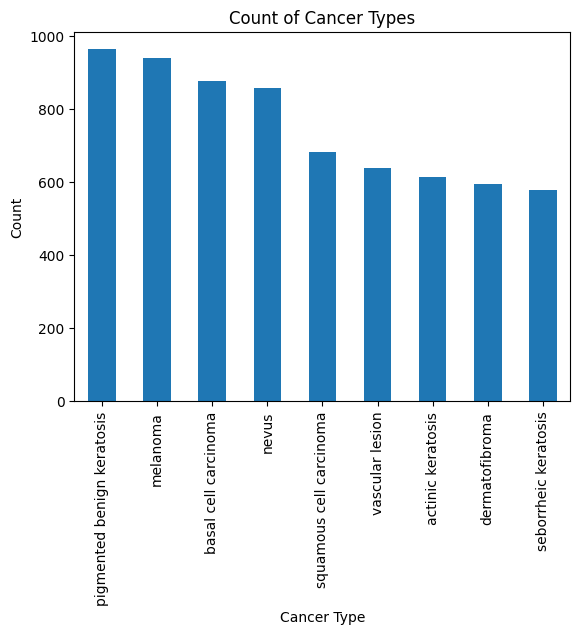

In [16]:
cancer_type_counts = new_df['cancer_type'].value_counts()
cancer_type_counts.plot(kind='bar')
plt.title('Count of Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Count')


plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [17]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [18]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [19]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [20]:
## your code goes here
num_classes =9
model=Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_classes,activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [23]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [24]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 970s 5s/step - loss: 1.9712 - accuracy: 0.2522 - val_loss: 2.0868 - val_accuracy: 0.2984
Epoch 2/50
169/169 [==============================] - 40s 227ms/step - loss: 1.6694 - accuracy: 0.3659 - val_loss: 1.5198 - val_accuracy: 0.4202
Epoch 3/50
169/169 [==============================] - 39s 226ms/step - loss: 1.5044 - accuracy: 0.4316 - val_loss: 1.6790 - val_accuracy: 0.3927
Epoch 4/50
169/169 [==============================] - 39s 225ms/step - loss: 1.4353 - accuracy: 0.4510 - val_loss: 1.4059 - val_accuracy: 0.5004
Epoch 5/50
169/169 [==============================] - 39s 227ms/step - loss: 1.3451 - accuracy: 0.4918 - val_loss: 1.3712 - val_accuracy: 0.5019
Epoch 6/50
169/169 [==============================] - 39s 223ms/step - loss: 1.3543 - accuracy: 0.4920 - val_loss: 1.2431 - val_accuracy: 0.5375
Epoch 7/50
169/169 [==============================] - 41s 236ms/step - loss: 1.2321 - accuracy: 0.5471 - val_loss: 1.1965 - val_accuracy: 0.559

#### **Todo:**  Visualize the model results

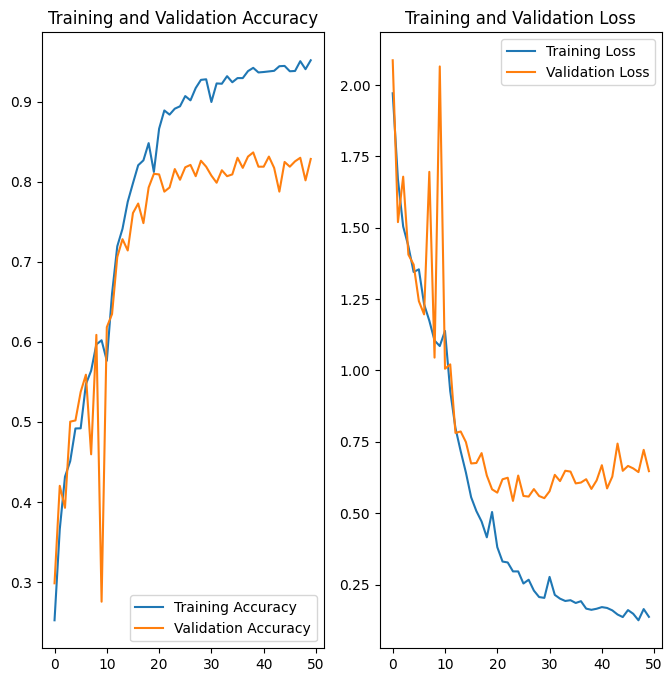

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [26]:

loss_train, accuracy_train = model.evaluate(train_ds, verbose=1,)
loss_validation, accuracy_validation = model.evaluate(val_ds, verbose=1)

print("Accuracy            : ", accuracy_train)
print("Validation Accuracy : ",accuracy_validation)
print("Loss                : ",loss_train)
print("Validation Loss     : ", loss_validation)


43/43 [==============================] - 8s 147ms/step - loss: 0.6472 - accuracy: 0.8285
Accuracy            :  0.9719955325126648
Validation Accuracy :  0.8285077810287476
Loss                :  0.06955240666866302
Validation Loss     :  0.6472486257553101


* The problems of underfitting and overfitting have been addressed.
* Utilizing the Augmentor library resolved the issue of data imbalance and led to an improvement in the training data's overall accuracy.
* Rebalancing the classes significantly enhanced the model's performance and accuracy without any overfitting, indicating that the issues have been successfully resolved.